# Power analysis

In [1]:
import os
import sys
sys.path.append('../scripts/')

from settings import DEFAULT_PARAMS
from sim_utils import set_causal_ids, sample_endo, sample_clusters, create_environment_factors

import numpy as np
import pandas as pd
from snakemake.utils import Paramspace

import matplotlib.pyplot as plt
import seaborn as sns

## Read dataframe with simulation parameters

In [2]:
params = pd.read_csv('../params.csv')
params['outfile'] = [p + '.txt' for p in Paramspace(params).instance_patterns]

for i in params.index:
    if not os.path.exists('../results/simulations/' + params.loc[i, 'outfile']):
        params.drop(i, inplace=True)
params = params.reset_index(drop=True)

Exclude calibration experiments:

In [3]:
params = params.query('r0 > 0 and n_causal_gxe > 0 and d_env > 1')

Simulated were one SNP with GxE effect for 100 genes and 100 individuals.

In [4]:
params

,n_genes,n_snps,n_causal_g,n_causal_gxe,r0,v0,likelihood,normalize,cells_per_individual,env,d_env,outfile
36,100,1,0,1,0.1,0.1,gaussian,False,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
37,100,1,0,1,0.1,0.1,negbin,True,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
38,100,1,0,1,0.1,0.1,zinb,True,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
39,100,1,0,1,0.2,0.1,gaussian,False,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
40,100,1,0,1,0.2,0.1,negbin,True,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
41,100,1,0,1,0.2,0.1,zinb,True,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
42,100,1,0,1,0.3,0.1,gaussian,False,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
43,100,1,0,1,0.3,0.1,negbin,True,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
44,100,1,0,1,0.3,0.1,zinb,True,fixed,endo,10,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...
45,100,1,0,1,0.1,0.1,gaussian,False,fixed,cluster_uniform,5,n_genes~100/n_snps~1/n_causal_g~0/n_causal_gxe...


## Plot true positives

A gene is called a true positive, if all GxE effects were significant at $FWER < \alpha=0.05$ (family-wise error rate). The FWER is computed by assuming 25 SNPs were tested for each gene.

In [5]:
def compute_tpr(pvals, gxe_causals, threshold=0.05, n_tested=25):
    """"True positive rate across all tested SNPs."""
    if len(gxe_causals) == 0:
        return 1
    return (pvals[:, gxe_causals] < threshold / n_tested).mean()

def get_causal_gxe(idx):
    causal_g, causal_gxe = set_causal_ids(
        n_causal_g=params.loc[i, 'n_causal_g'],
        n_causal_gxe=params.loc[i, 'n_causal_gxe'],
        n_causal_shared=DEFAULT_PARAMS['n_causal_shared'])
    return causal_gxe

In [6]:
for i in params.index:
    fname = '../results/simulations/' + params.loc[i, 'outfile']
    if os.path.exists(fname):
        pvals = pd.read_csv(fname, header=None).to_numpy()
        causals = get_causal_gxe(i)
        params.loc[i, 'TPR'] = compute_tpr(pvals, causals)

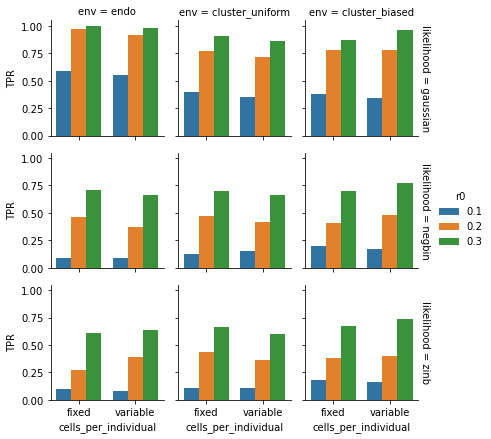

In [7]:
sns.catplot(
    x='cells_per_individual', y='TPR', 
    hue='r0', col='env', row='likelihood', 
    data=params,
    kind='bar', margin_titles=True, height=2);